/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


[44.07529668]


/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


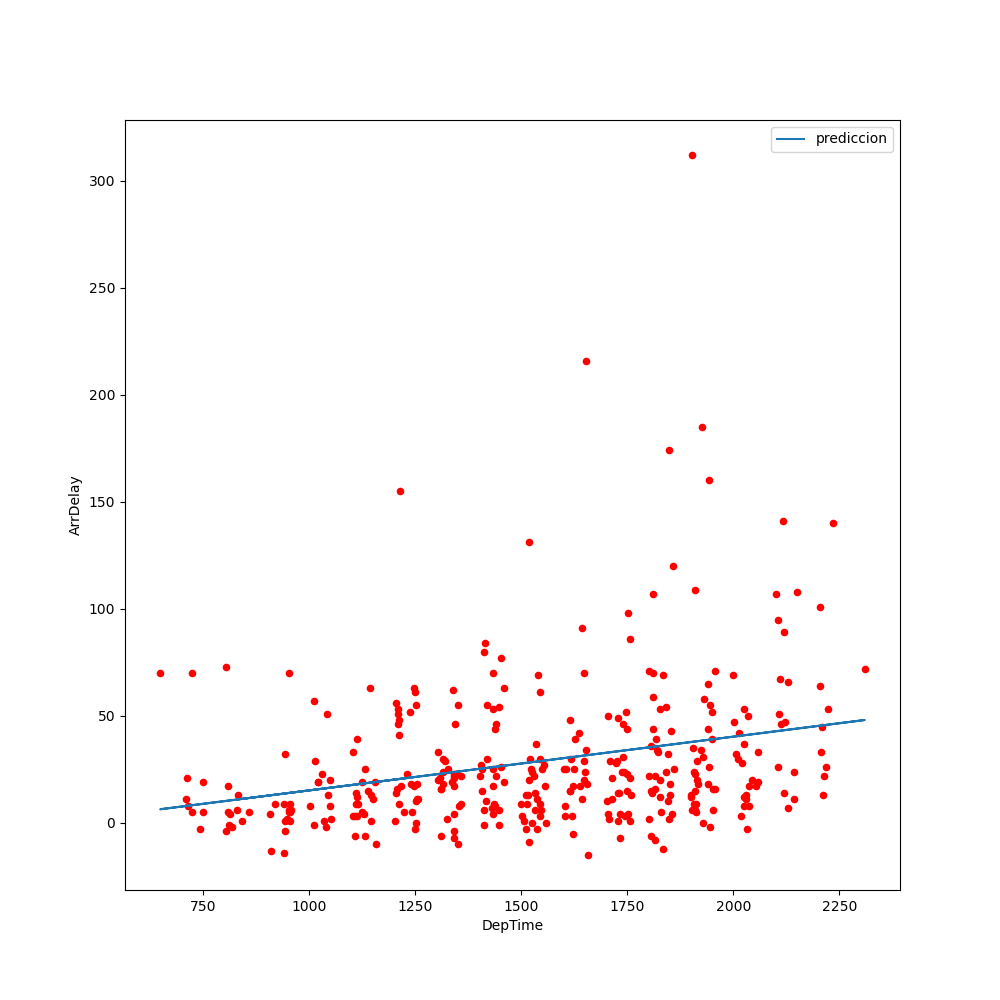

In [56]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

source = "./FlightsFromLAS.csv"

# Creación del dataframe a partir del dataset con las horas de los vuelos
df = pd.read_csv(source)

modelo = LinearRegression()

# Entrenar el modelo con los datos de las columnas "DepTime" y "ArrDelay" del dataset
modelo.fit(df[["DepTime"]], df["ArrDelay"])

# Predecir el tiempo en minutos de retraso que tendrá un vuelo con la hora de salida asignada a la variable 
hora_salida_vuelo = 2151 # Formato: HHMM
mi_prediccion = modelo.predict([[hora_salida_vuelo]])
print(mi_prediccion)

# Gráfica que muestra la regresión lineal completa
prediccion = pd.Series(modelo.predict(df[["DepTime"]]))
df["prediccion"] = prediccion
ax = df.plot.line(x="DepTime", y="prediccion")
df.plot.scatter(x="DepTime", y="ArrDelay", ax=ax, color="r", figsize=(10,10))
plt.show()